In [1]:
import requests

# 모델의 raw URL을 사용합니다.
url = 'https://github.com/NostalgicJ/Quantum_2023/raw/test/RNN_Practice/8/saved_models/SimpleRNN_model.h5'
response = requests.get(url, allow_redirects=True)

# 모델 저장하기
with open('SimpleRNN_model.h5', 'wb') as f:
    f.write(response.content)

In [2]:
from tensorflow.keras.models import load_model

loaded_model = load_model('SimpleRNN_model.h5')

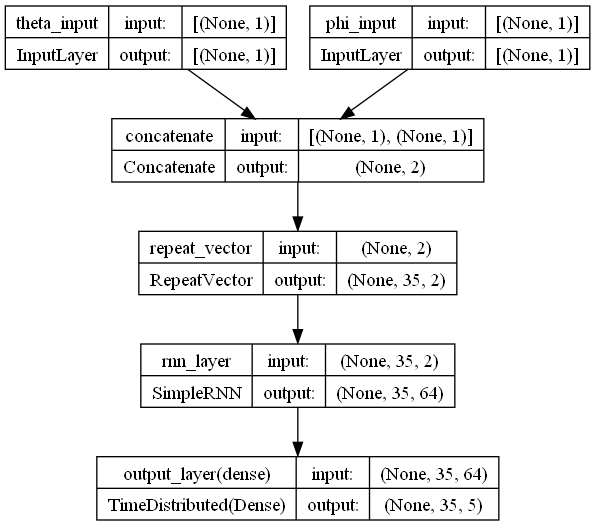

In [3]:
from tensorflow.keras.utils import plot_model

# 모델 구조 시각화
plot_model(loaded_model, to_file='SimpleRNN_model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
import numpy as np

# 새로운 theta와 phi 값 정의
new_theta = np.array([np.pi/2]).reshape(-1, 1)  # 예시 값
new_phi = np.array([np.pi]).reshape(-1, 1)    # 예시 값

# 모델로 예측
predicted_sequence = loaded_model.predict([new_theta, new_phi])

# 결과 출력 (예측값은 확률 분포로 나올 것이므로 가장 높은 확률을 가진 인덱스를 선택)
predicted_sequence_indices = np.argmax(predicted_sequence, axis=-1)
print(predicted_sequence_indices[0])

1/1 [==============================] - 0s 191ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 4 4 1 1 3 3 2 2 4 4 1 1 3 3 2]


In [27]:
import pandas as pd

# 깃허브에서 CSV 파일 다운로드
csv_url = "https://github.com/NostalgicJ/Quantum_2023/raw/test/NVspinData_None_combination_230818.csv"
df = pd.read_csv(csv_url)

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,Theta,Phi
0,3.025707,2.682209
1,0.704721,0.182505
2,1.999596,0.303008
3,0.604682,1.073831
4,2.192289,2.523050


In [28]:
# 예측 수행
theta = shuffled_data['Theta'].values.reshape(-1, 1)
phi = shuffled_data['Phi'].values.reshape(-1, 1)
predictions = loaded_model.predict([theta, phi])

# 예측 결과를 원하는 형태로 가공 (예: 가장 확률이 높은 클래스를 선택하는 경우)
predicted_sequences = np.argmax(predictions, axis=-1)  # 이 부분은 예측 결과의 형태와 원하는 출력에 따라 조절이 필요합니다.

# 원본 DataFrame에 예측 결과를 추가
shuffled_data['Predicted'] = list(predicted_sequences)

386/386 [==============================] - 1s 3ms/step


In [29]:
import os

# 결과를 저장할 디렉토리 생성
results_dir = 'data_results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# 결과를 CSV 파일로 해당 디렉토리에 저장
output_path = os.path.join(results_dir, "SimpleRNN_data_results.csv")
shuffled_data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: data_results\SimpleRNN_data_results.csv
